# Problem Statement

**Dataset**  
Telco-Customer-Churn.csv

**Content**  
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**Objective**  
Identify whether a customer has churned or not. Once we build a model capable of predicting this well, we can then analyze relevant customer data and develop focused customer retention programs.  

**The data set includes information about:**  
Customers who left within the last month – the column is called Churn.  
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.  
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.  
Demographic info about customers – gender, age range, and if they have partners and dependents

# Import Library

In [24]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve

# Read Data from Google Drive

In [26]:
'''
Read the provided Excel file into a Pandas DataFrame.
'''
# INSERT CODE HERE
data = pd.read_csv('Telco-Customer-Churn.csv')

In [27]:
'''
View the top few rows of the dataframe
'''
# INSERT CODE HERE
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
'''
Print information about a DataFrame including the index dtype and columns and non-null values.
'''
# INSERT CODE HERE
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
## Check for null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
### Checking for NaN values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
'''
As ID column is not relevant in creating any decision on churn or not, we shall remove the column "ID"
'''
# INSERT CODE HERE
data = data.drop(['customerID'], axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA


<Axes: xlabel='count', ylabel='Churn'>

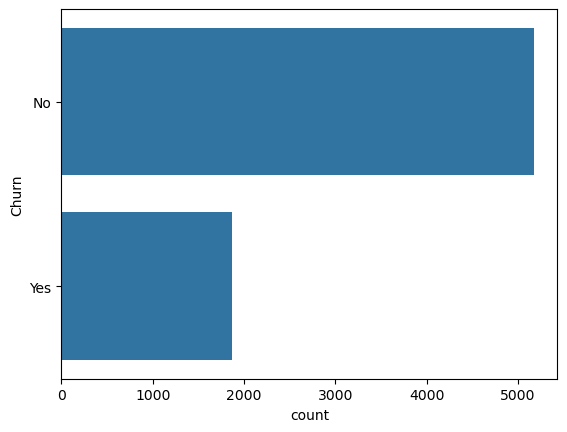

In [32]:
'''
Create a bar plot to visualize the distribution of the target variable 'Churn' in the given DataFrame.
Hint: use sns.countplot
'''
# INSERT CODE HERE
sns.countplot(data['Churn'])

In [33]:
'''
Now, view distribution of target variable without using a plot.
Hint: Use value_counts function of pandas
'''
# INSERT CODE HERE
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

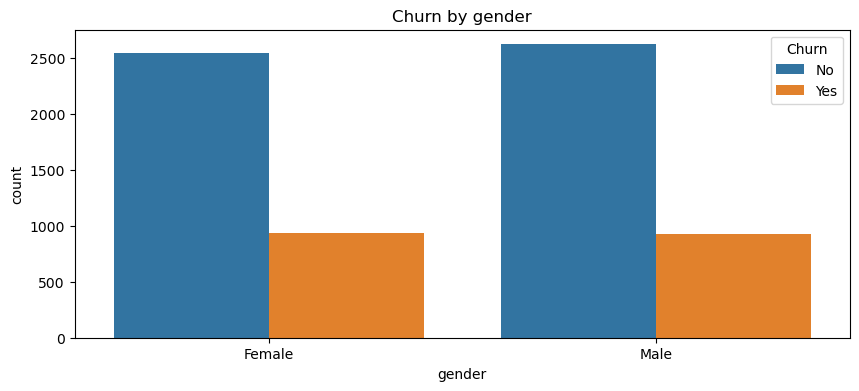

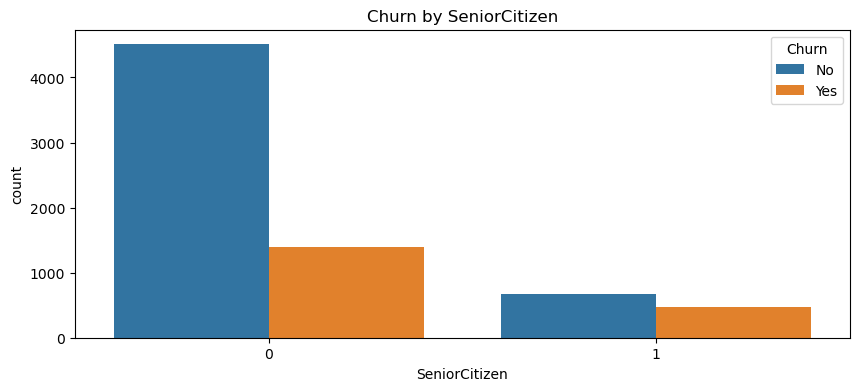

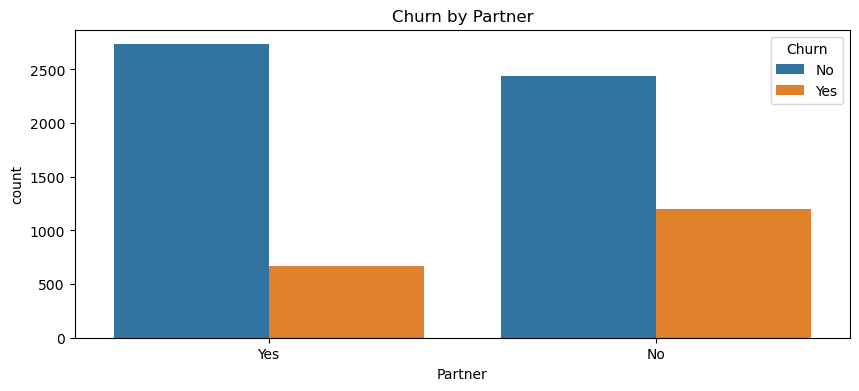

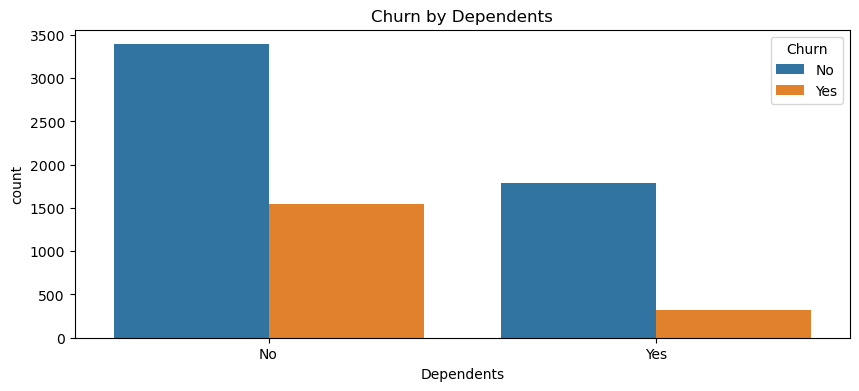

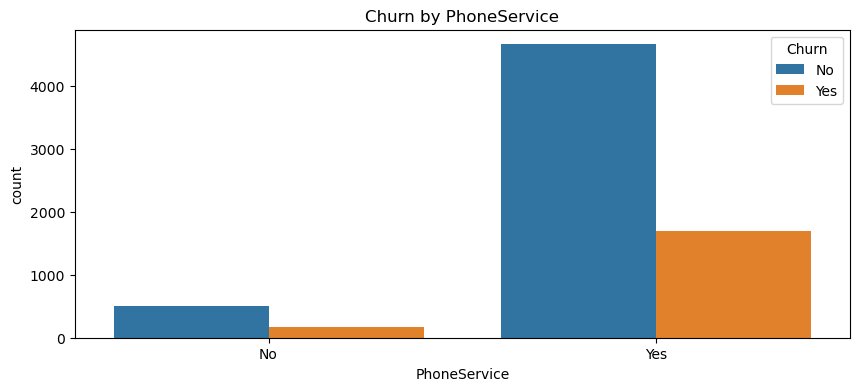

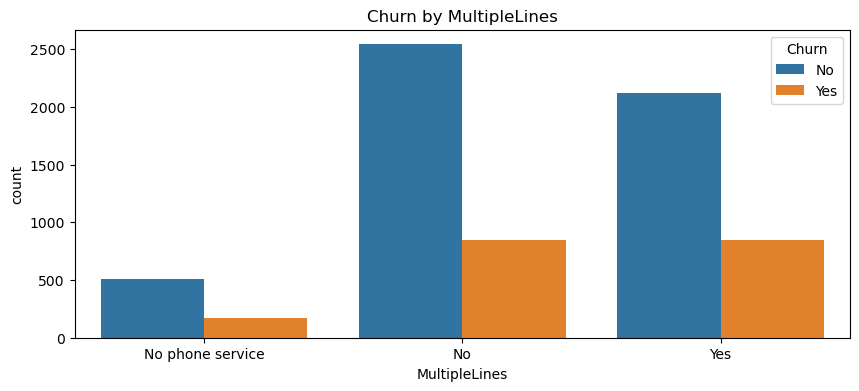

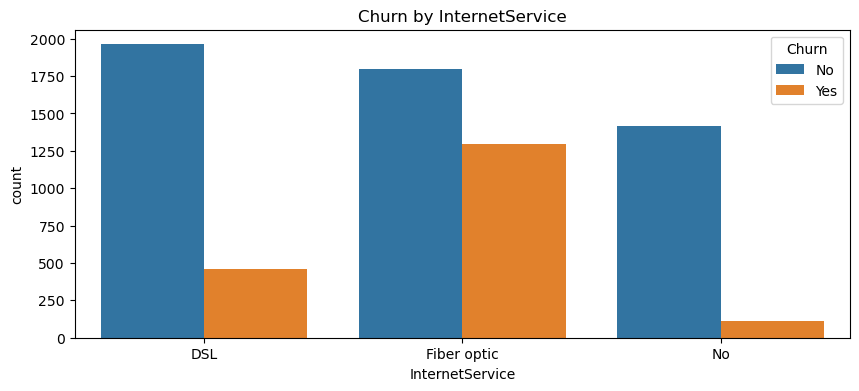

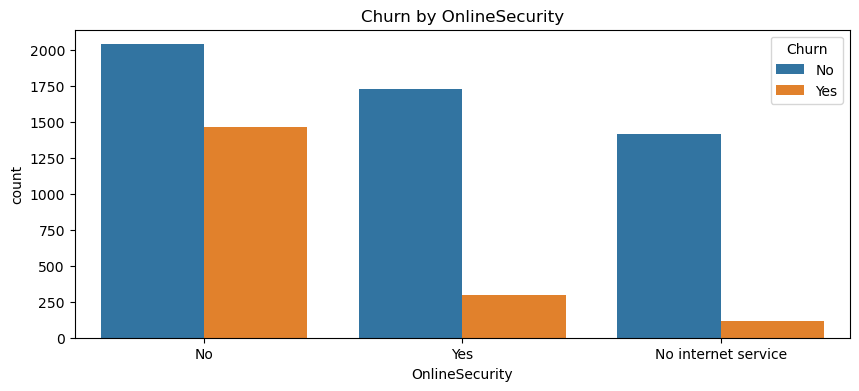

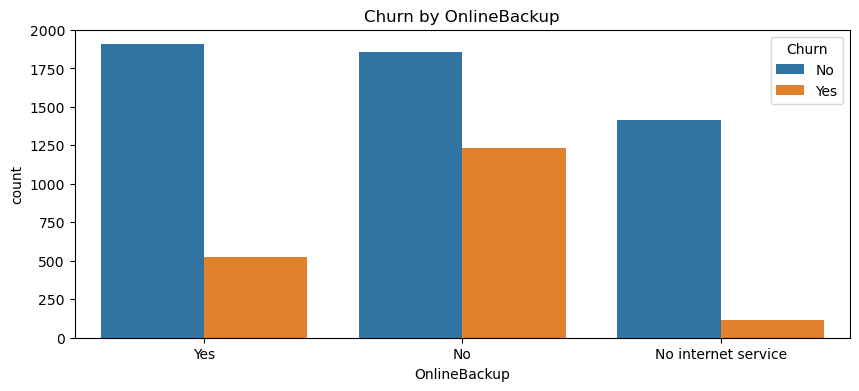

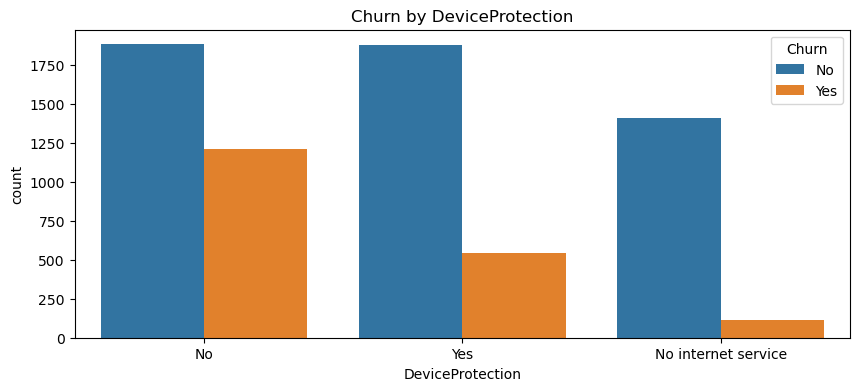

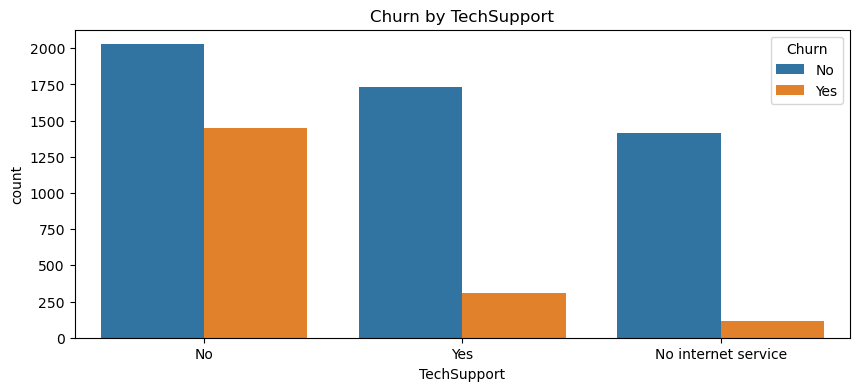

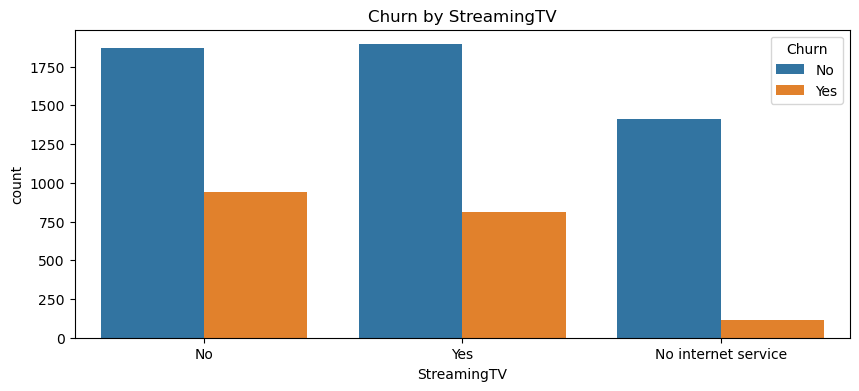

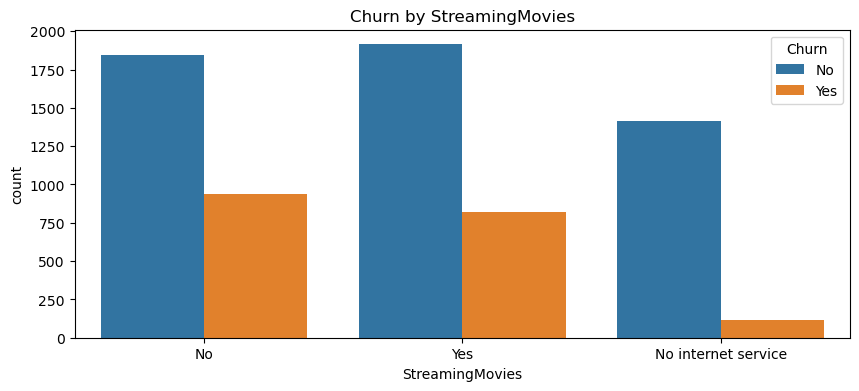

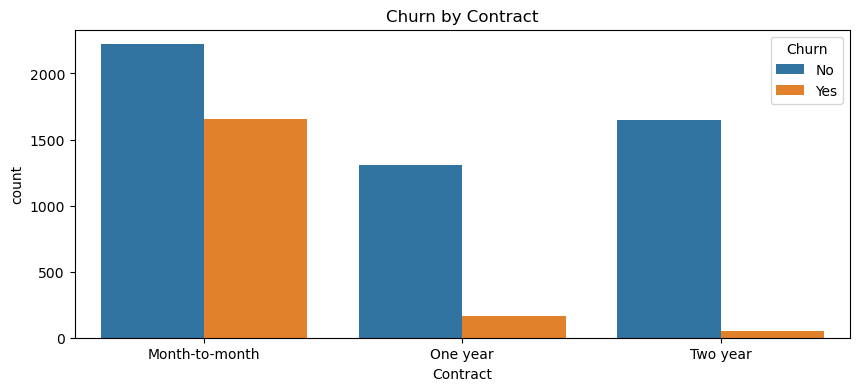

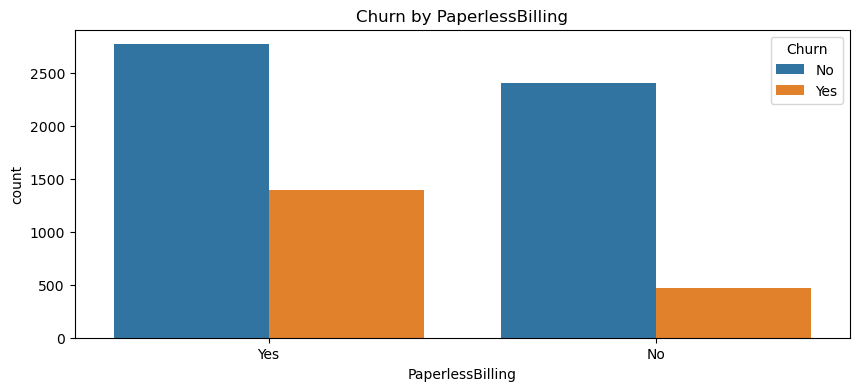

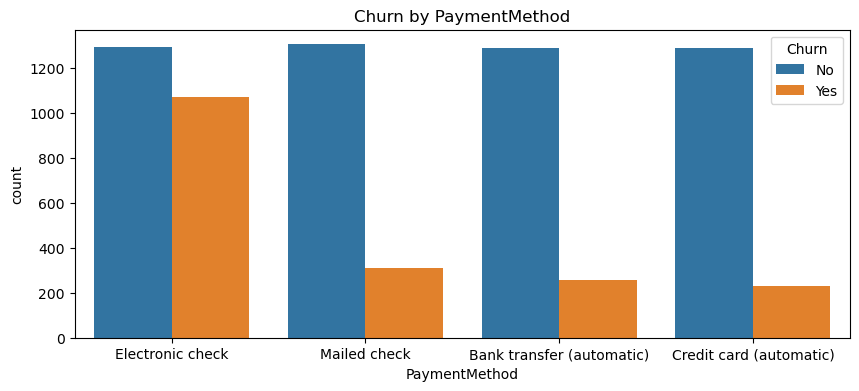

In [34]:
'''
Analyze churn rate by categorical features.  
Create a bar plot for each categorical feature, showing the churn count for each category, with a figure size of (10, 4).  
Add a title "Churn by {column}" to each plot, where {column} is the name of the categorical feature.  
Hint: Use sns.countplot  
'''
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for column in categorical_columns:
    # INSERT CODE HERE FOR THE PLOT
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=column, hue='Churn')
    plt.title(f'Churn by {column}')
    plt.show()

In [35]:
'''
Perform a similar analysis without using a plot.
Take MultipleLines as the categorical feature. Group data based on MultipleLines. Then check the unique count of Churn variable.
'''
# COMPLETE THIS CODE WHEREVER _____ IS PRESENT
data.groupby('MultipleLines').Churn.value_counts(normalize=True)

MultipleLines     Churn
No                No       0.749558
                  Yes      0.250442
No phone service  No       0.750733
                  Yes      0.249267
Yes               No       0.713901
                  Yes      0.286099
Name: proportion, dtype: float64

In [36]:
'''
Do the same based on column Gender
'''
# INSERT CODE HERE
data.groupby('gender').Churn.value_counts(normalize=True)

gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: proportion, dtype: float64

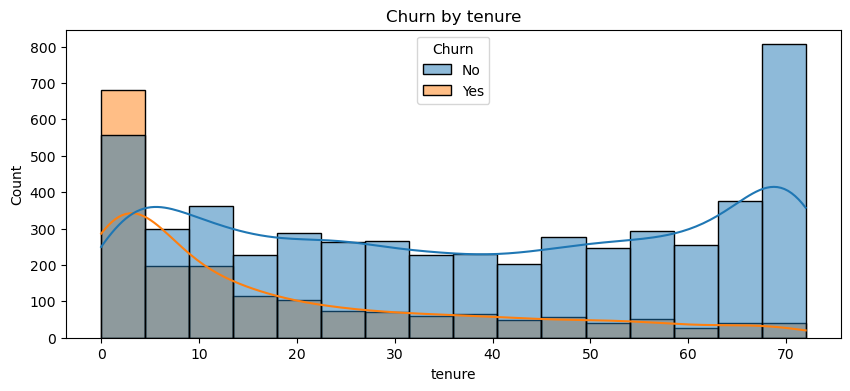

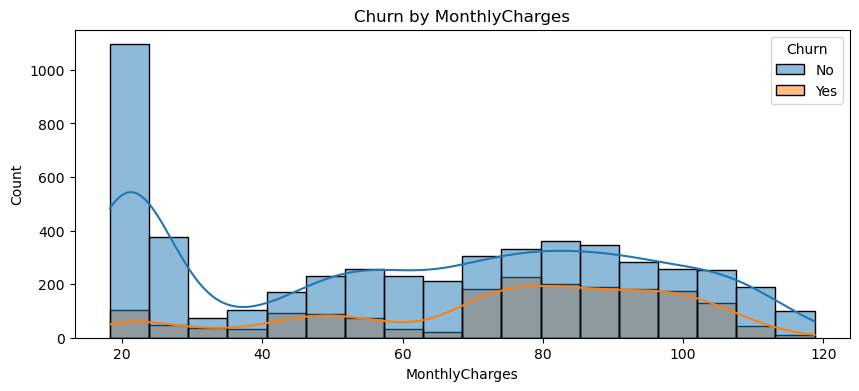

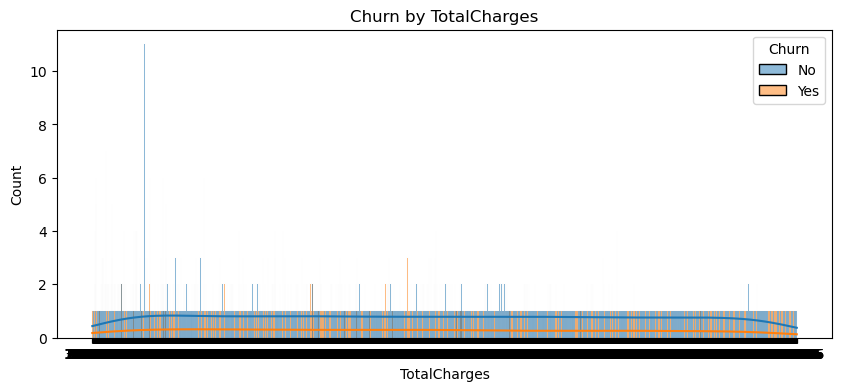

In [37]:
'''
Analyze churn rate by numeric features 
Do the same, similar to what we did for categorical variables.
QUESTION: Do you think sns.countplot  makes sense here?
Hint: Check out sns.histplot
'''

numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numeric_columns:
    # INSERT CODE HERE FOR THE PLOT
    plt.figure(figsize=(10, 4))
    sns.histplot(x=column, hue='Churn', data=data, kde=True)
    plt.title(f'Churn by {column}')
    plt.show()

In [38]:
'''
Map Churn variable to 1 or 0, instead of Yes or No respectively.  
Create a new column churn_zero_one to represent this.
'''
data["churn_zero_one"] = 0

# COMPLETE THIS CODE WHEREVER _____ IS PRESENT
data.loc[data["Churn"]=='Yes', "churn_zero_one"] = 1
data.churn_zero_one.value_counts()

churn_zero_one
0    5174
1    1869
Name: count, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [45]:
'''
Convert the 'TotalCharges' column in the given `data` DataFrame to numeric values.  
Use the `pd.to_numeric` function and handle errors by setting them as 'coerce'.  
After converting the column, fill any missing values with the mean of the 'TotalCharges' column.  
'''
# INSERT CODE HERE
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

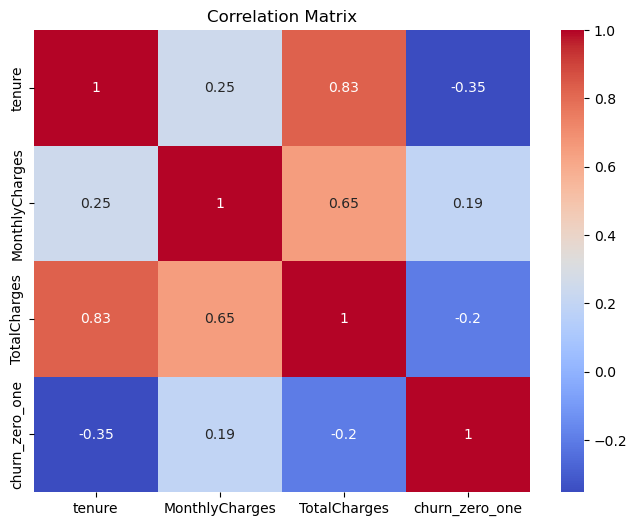

In [47]:
'''
Analyze the correlation between numeric features in the given DataFrame.  
Create a heatmap to visualize the correlation matrix of the numeric features with a figure size of (8, 6).  
Use the "coolwarm" color map and add a title "Correlation Matrix" to the plot.

Hint: Use ONLY numeric features and churn_zero_one columns for this
Hint: Use sns.heatmap for the heatmap
Hint: Use .corr() function of pandas to calculate correlation
'''
# INSERT CODE HERE
plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_columns+["churn_zero_one"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Figure size 1000x400 with 0 Axes>

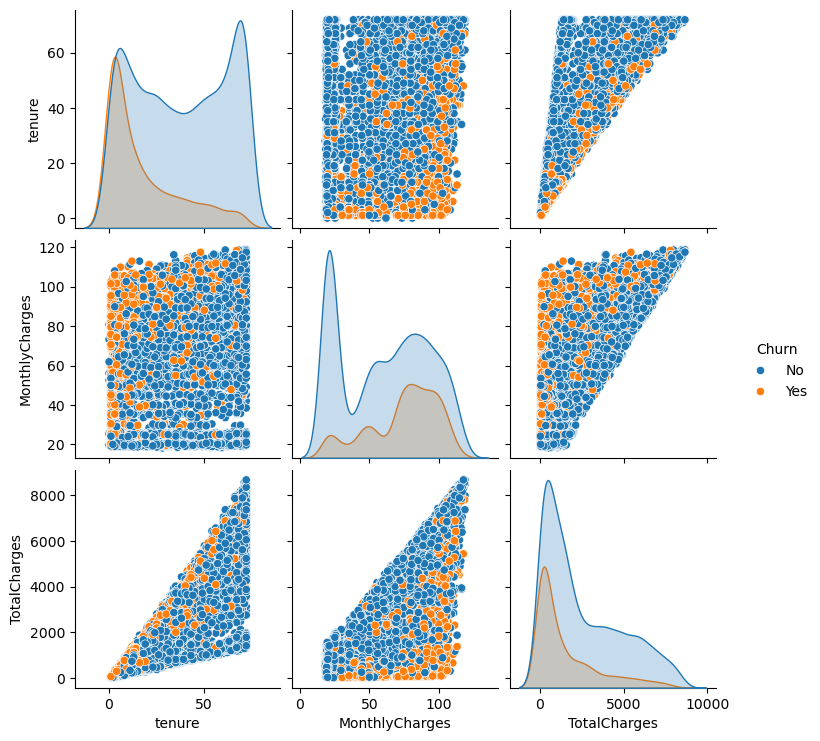

In [48]:
'''
Analyze the distribution of numeric features using sns.pairplot with hue as Churn
'''
plt.figure(figsize=(10, 4))
sns.pairplot(data[[*numeric_columns, 'Churn']], hue='Churn')
plt.show()

# Feature Engineering

In [49]:
'''
Convert the 'TotalCharges' column in the given `data` DataFrame to numeric values.  
Use the `pd.to_numeric` function and handle errors by setting them as 'coerce'.  
After converting the column, fill any missing values with the mean of the 'TotalCharges' column.  
'''
# INSERT CODE HERE
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

/var/folders/qq/_4xqykc134ggv9pcfdm34xqw0000gn/T/ipykernel_37044/279314771.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


## Categorical Feature Handling

In [50]:
'''
One-hot encode categorical features.  
Use get_dummies() function of pandas for this.
'''
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,churn_zero_one,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,0,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,No,0,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,1,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,No,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,Yes,1,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   object 
 5   churn_zero_one                         7043 non-null   int64  
 6   gender_Male                            7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [52]:
# Encode the 'Churn' column
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [55]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [54]:
data = data.drop("churn_zero_one",axis=1)

# Model Training

In [56]:
'''
Split the dataset into train and test.  
Split the given `data` DataFrame into training and testing sets.  
Drop the 'customerID' and 'Churn' columns from the input features (X), and use the 'Churn' column as the target variable (y).  
Use a test size of 0.2 and a random state of 42.
'''
X = data.drop(['Churn'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
'''
Scale the data.  
Scale the input features (X_train and X_test) using the StandardScaler from scikit-learn.
Fit the scaler on the training data (X_train) and transform both the training and testing data (use fit_transform for this).  
'''
scaler = StandardScaler()
# INSERT CODE to fit and transform the X_train and X_test using StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
pd.DataFrame(X_train, columns=X.columns).head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.436831,0.881078,0.195927,0.653409,0.968056,1.030066,1.518718,0.323478,-0.323478,1.153199,...,-0.528699,1.259591,-0.528699,-0.800374,1.917660,-0.562826,0.841222,-0.524928,1.399708,-0.539991
1,-0.436831,-1.284263,0.522755,-0.976487,0.968056,-0.970811,-0.658450,0.323478,-0.323478,-0.867153,...,-0.528699,1.259591,-0.528699,-0.800374,-0.521469,-0.562826,0.841222,-0.524928,1.399708,-0.539991
2,-0.436831,-0.793997,-1.509551,-0.897365,0.968056,-0.970811,-0.658450,0.323478,-0.323478,-0.867153,...,1.891436,-0.793909,1.891436,-0.800374,1.917660,-0.562826,-1.188746,1.905022,-0.714435,-0.539991
3,2.289215,-0.344587,1.053643,-0.012142,-1.032999,1.030066,1.518718,0.323478,-0.323478,-0.867153,...,-0.528699,1.259591,-0.528699,1.249415,-0.521469,1.776747,0.841222,-0.524928,1.399708,-0.539991
4,2.289215,-1.079985,0.308740,-0.812876,-1.032999,-0.970811,-0.658450,0.323478,-0.323478,-0.867153,...,-0.528699,-0.793909,-0.528699,-0.800374,-0.521469,-0.562826,0.841222,-0.524928,1.399708,-0.539991


In [58]:
'''
Build the logistic regression model. 
Build a logistic regression model using scikit-learn's LogisticRegression class.
Fit the model on the training data (X_train and y_train) and make predictions on the testing data (X_test).
'''
log_reg = LogisticRegression()
# INSERT CODE to fit the logisitc regression model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [59]:
'''
Make predictions
'''
y_pred = log_reg.predict(X_test)

In [60]:
'''
Calculate and print the following evaluation metrics for the logistic regression model:  
accuracy, precision, recall, F1-score, and AUC (Area Under the Curve).
Also print the classification report.
'''
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("AUC: ", auc)

Accuracy:  0.8121154756270705
Precision:  0.6832298136645962
Recall:  0.5749128919860628
F1-score:  0.6244087038789026
AUC:  0.7377488436538501


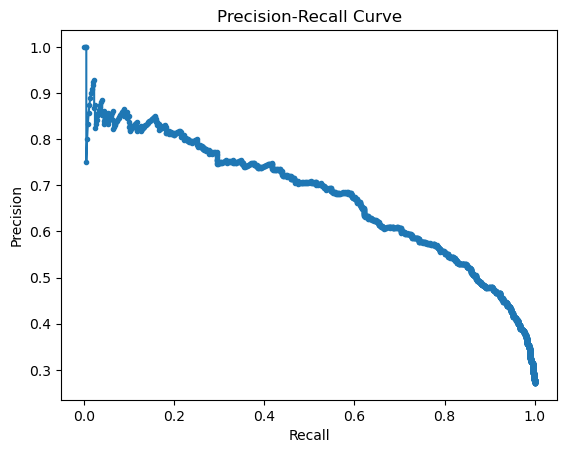

In [63]:
'''
Calculate the probability of the target class (class 1) using the logistic regression model.  
Then, calculate the precision and recall values for different thresholds and plot the Precision-Recall curve with markers at each point.
'''

'''
Calculate the probability of the target class (class 1)
'''
y_prob = log_reg.predict_proba(X_test)[:, 1]


'''
Calculate precision and recall for different thresholds
'''
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)


'''
Plot the Precision-Recall curve
'''
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ADVANCED SECTION: HyperParameter Tuning

for parameter referes https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html




1. `'C'`: This parameter represents the inverse of regularization strength. Smaller values of `C` result in stronger regularization, which can help prevent overfitting by penalizing large coefficients in the model.

2. `'penalty'`: This parameter determines the type of regularization to be applied to the model. Regularization is used to prevent overfitting by penalizing large coefficients in the model. The `'l2'` penalty, also known as Ridge regularization, adds the squared magnitude of the coefficients to the loss function. In this case, you have specified only the `'l2'` penalty.

3. `'solver'`: This parameter specifies the optimization algorithm to be used for training the logistic regression model. Different solvers have different performance characteristics and may be more suitable for specific types of datasets or problems. In this case, you have specified five solvers:

   - `'newton-cg'`: Newton Conjugate Gradient, a second-order optimization method that approximates the Hessian matrix for efficient optimization. Suitable for large datasets and supports L2 regularization.
   - `'lbfgs'`: Limited-memory Broyden-Fletcher-Goldfarb-Shanno, a quasi-Newton method that also approximates the Hessian matrix. Suitable for small to moderately-sized datasets and supports L2 regularization. It is the default solver in scikit-learn.
   - `'liblinear'`: A linear solver that uses the coordinate gradient descent algorithm. Suitable for smaller datasets and supports both L1 and L2 regularization. However, it may have slower convergence for large datasets.
   - `'sag'`: Stochastic Average Gradient descent, an optimization algorithm that uses a random sample of the data at each iteration. Suitable for large datasets and supports L2 regularization.
   - `'saga'`: Stochastic Average Gradient descent with support for both L1 and L2 regularization. Suitable for large datasets and sparse data.

In [64]:
'''
Custom parameter grid
'''

param_grid = [
    {'penalty': ['l1'],
     'solver': ['liblinear', 'saga'],
     'C': [0.001, 0.01, 0.1, 1, 10],
     'max_iter': [1000, 5000],
     'class_weight': [None]
    },
    {'penalty': ['l2'],
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'C': [ 1, 10, 20, 50],
     'max_iter': [1000, 5000],
     'class_weight': [None]
    },
    {'penalty': ['elasticnet'],
     'solver': ['saga'],
     'C': [0.001, 0.01, 0.1, 1, 10, 50],
     'max_iter': [1000, 5000],
     'class_weight': [None],
     'l1_ratio': [0, 0.3, 0.5, 0.7, 1]
    }
]

In [65]:
'''
Create a custom parameter grid for tuning a logistic regression model using GridSearchCV with 5-fold cross-validation, and optimize for accuracy.  
Fit the grid search on the training data (X_train and y_train) and print the best parameters and the corresponding score.  
Evaluate the best model on the test set (X_test) and calculate the accuracy, precision, recall, F1-score, and AUC.  

Hint: Use GridSearchCV function
'''

log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'C': 0.1, 'class_weight': None, 'l1_ratio': 0, 'max_iter': 1000, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Accuracy:  0.8034482758620689


In [66]:
'''
Evaluate the best model on the test set
'''
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

'''
Calculate the accuracy, confusion matrix, and classification report
'''
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
auc = roc_auc_score(y_test, y_pred_best)

'''
Print the results
'''
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("AUC: ", auc)

Accuracy:  0.8116422148603881
Precision:  0.6864406779661016
Recall:  0.5644599303135889
F1-score:  0.6195028680688337
AUC:  0.734146794266606


## Intuitively explain the metrics here, from our usecase perspective

In [ ]:
'''
Add explanation here
'''